# Simple text classification using ```scikit-learn```

## Import packages


In [9]:
# system tools
import os
import sys
sys.path.append("..")

# data munging tools
import pandas as pd
import utils.classifier_utils as clf

# Machine learning stuff
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn import metrics

# Visualisation
import matplotlib.pyplot as plt

## Reading in the data

Our data is already in a tabular format, so we're going to load it using ```pandas```

In [11]:
filename = os.path.join("..","cds-language", "data","fake_or_real_news.csv")

data = pd.read_csv(filename, index_col=0)

__Inspect data__

In [12]:
data.sample(10)

,title,text,label
1616,Rubio battles Cruz for Iowa edge,"Killing Obama administration rules, dismantlin...",REAL
5819,Biden and Trump Agree to Fight Pistol Duel--Fi...,"Thursday, 27 October 2016 Biden and Trump to D...",FAKE
9859,"Mark Crispin Miller, a professor at New York U...","Mark Crispin Miller, a professor at New York U...",FAKE
1398,"The Perfect State Index: If Iowa, N.H. Are Too...","The Perfect State Index: If Iowa, N.H. Are Too...",REAL
7734,US uses Tunisia as drone base for Libya operat...,US uses Tunisia as drone base for Libya operat...,FAKE
3815,Obama to focus on future in State of the Union...,(CNN) As White House officials began preparing...,REAL
695,How Donald Trump could win,"In just the past week, he's caused an uproar b...",REAL
8352,US General: Warplanes Will Kill Fleeing ISIS F...,Iraqi Govt Warns Civilians Against Fleeing Mos...,FAKE
7923,"Look out, Paul Ryan! Masochist Paul Nehlen is ...","— Stephen Miller (@redsteeze) October 26, 2016...",FAKE
5993,Concert plus campaign: Clinton turns to celebr...,By Reuters 7:16 pm Heading into the homestre...,FAKE


In [13]:
data.shape

(6335, 3)

<br>
Q: How many examples of each label do we have?

In [14]:
data["label"].value_counts()

label
REAL    3171
FAKE    3164
Name: count, dtype: int64

<br>

Let's now create new variables called ```X``` and ```y```, taking the data out of the dataframe so that we can mess around with them.

In [15]:
X = data["text"]
y = data["label"]

## Train-test split

I've included most of the 'hard work' for you here already, because these are long cells which might be easy to mess up while live-coding.

Instead, we'll discuss what's happening. If you have questions, don't be shy!

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,           # texts for the model
                                                    y,          # classification labels
                                                    test_size=0.2,   # create an 80/20 split
                                                    random_state=42) # random state for reproducibility

## Vectorizing and Feature Extraction

Vectorization. What is it and why are all the cool kids talking about it?

Essentially, vectorization is the process whereby textual or visual data is 'transformed' into some kind of numerical representation. One of the easiest ways to do this is to simple count how often individual features appear in a document.

Take the following text: 
<br><br>
<i>My father’s family name being Pirrip, and my Christian name Philip, my infant tongue could make of both names nothing longer or more explicit than Pip. So, I called myself Pip, and came to be called Pip.</i>
<br>

We can convert this into the following vector

| and | be | being | both | called | came | christian | could | explicit | family | father | i | infant | longer | make | more | my | myself | name | names | nothing | of | or | philip | pip | pirrip | s | so | than | to | tongue|
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |  --- |
| 2 | 1 | 1 | 1 | 2 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 3 | 1 | 2 | 1 | 1 | 1 | 1 | 1 | 3 | 1 | 1 | 1 | 1 | 1 | 1 |

<br>
Our textual data is hence reduced to a jumbled-up 'vector' of numbers, known somewhat quaintly as a <i>bag-of-words</i>.
<br>
<br>
To do this in practice, we first need to create a vectorizer. 

Tfidf vectors tend to be better for training classifiers. Why might that be?

__Create vectorizer object__

In [17]:
vectorizer = TfidfVectorizer(ngram_range = (1,2),     # unigrams and bigrams (1 word and 2 word units)
                             lowercase =  True,       # why use lowercase?
                             max_df = 0.95,           # remove very common words
                             min_df = 0.05,           # remove very rare words
                             max_features = 100)      # keep only top 100 features

This vectorizer is then used to turn all of our documents into a vector of numbers, instead of text.

In [18]:
# first we fit to the training data...
X_train_feats = vectorizer.fit_transform(X_train)

#... then do it for our test data
X_test_feats = vectorizer.transform(X_test)

# get feature names
feature_names = vectorizer.get_feature_names_out()

## Classifying and predicting

We now have to 'fit' the classifier to our data. This means that the classifier takes our data and finds correlations between features and labels.

These correlations are then the *model* that the classifier learns about our data. This model can then be used to predict the label for new, unseen data.

In [19]:
classifier = LogisticRegression(random_state=42).fit(X_train_feats, y_train)

Q: How do we use the classifier to make predictions?

In [20]:
y_pred = classifier.predict(X_test_feats)

Q: What are the predictions for the first 20 examples of the test data?

In [21]:
print(y_pred[:20])

['FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'REAL' 'FAKE' 'REAL' 'FAKE'
 'REAL' 'REAL' 'REAL' 'FAKE' 'REAL' 'REAL' 'FAKE' 'REAL' 'REAL' 'REAL']


We can also inspect the model, in order to see which features are most informative when trying to predict a label. 

To do this, we can use the ```show_features``` function that I defined earlier - how convenient!

Q: What are the most informative features? Use ```show_features```to find out!

In [22]:
clf.show_features(vectorizer, y_train, classifier, n=20)

FAKE				REAL

-4.3803	by             		5.3471	republican     
-3.6202	us             		5.2193	said           
-2.7769	you            		3.7399	obama          
-2.6218	just           		3.4983	state          
-2.1811	this           		2.8368	who            
-1.8911	be             		2.7182	that           
-1.7431	to the         		2.6008	president      
-1.7128	that the       		2.3978	than           
-1.6080	with           		2.1384	campaign       
-1.5910	into           		2.1343	more           
-1.4974	been           		2.1314	party          
-1.3538	is             		2.1239	two            
-1.3343	was            		2.0176	on the         
-1.3270	which          		1.8099	states         
-1.1413	of             		1.7531	could          
-1.0842	now            		1.7189	most           
-1.0386	their          		1.6430	he             
-0.9210	they           		1.6219	in             
-0.8902	so             		1.5984	she            


## Evaluate

We can also do some quick calculations, in order to assess just how well our model performs.

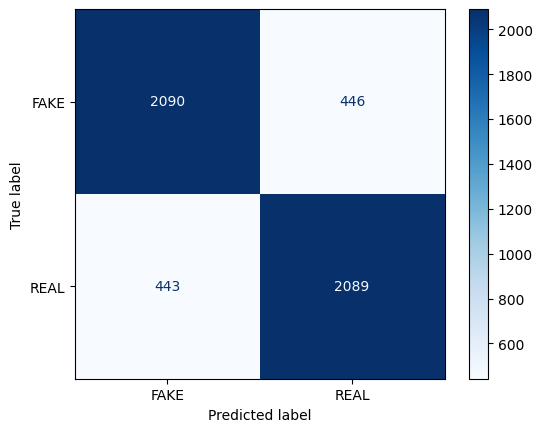

In [23]:
metrics.ConfusionMatrixDisplay.from_estimator(classifier,           # the classifier name
                                            X_train_feats,          # the training features
                                            y_train,                # the training labels
                                            cmap=plt.cm.Blues,      # make the colours prettier
                                            labels=["FAKE", "REAL"])# the labels in your data arranged alphabetically

This confusion matrix can be broken down a little bit more and used to draw more meaningful statistical results:

<img src="../img/confusionMatrix.jpg" alt="Alternative text" />

__Calculating metrics__

```scikit-learn``` has a built-in set of tools which can be used to calculate these metrics, to get a better idea of how our model is performing.

In [24]:
classifier_metrics = metrics.classification_report(y_test, y_pred)
print(classifier_metrics)

              precision    recall  f1-score   support

        FAKE       0.84      0.81      0.82       628
        REAL       0.82      0.85      0.83       639

    accuracy                           0.83      1267
   macro avg       0.83      0.83      0.83      1267
weighted avg       0.83      0.83      0.83      1267



## Cross validation and further evaluation

One thing we can't be sure of is that our model performance is simply related to how the train-test split is made.

To try to mitigate this, we can perform cross-validation, in order to test a number of different train-test splits and finding the average scores.

Let's do this on the full dataset:

In [25]:
X_vect = vectorizer.fit_transform(X)

The first plot is probably the most interesting. Some terminology:

- If two curves are "close to each other" and both of them but have a low score, the model suffers from an underfitting problem (High Bias)

- If there are large gaps between two curves, then the model suffer from an overfitting problem (High Variance)


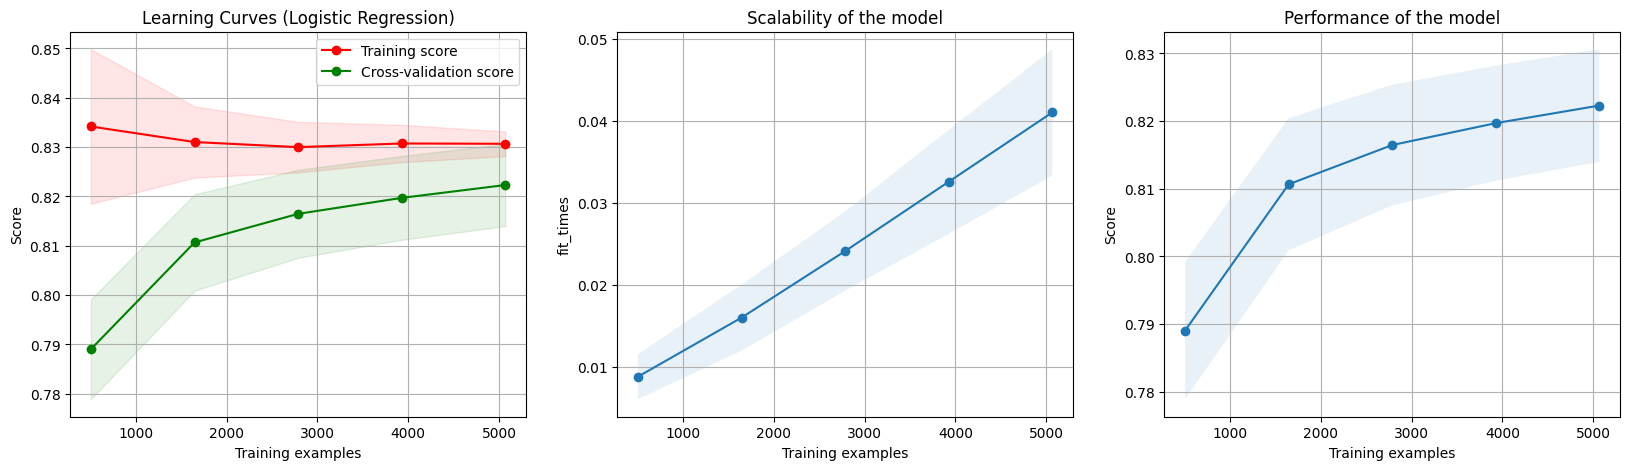

In [28]:
title = "Learning Curves (Logistic Regression)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = LogisticRegression(random_state=42)
clf.plot_learning_curve(estimator, title, X_vect, y, cv=cv, n_jobs=4)

- The second plot shows how model performance scales when more data is added;
- The third plot shows how much of a performance improvement we get from adding more data

## Save models

It is also somewhat trivial to save models and reload them for later use. For that, we can use the library ```joblib```.

In [ ]:
from joblib import dump, load
dump(classifier, "LR_classifier.joblib")
dump(vectorizer, "tfidf_vectorizer.joblib")

We can restart the kernel for our notebook to see how that works:

In [ ]:
from joblib import dump, load
loaded_clf = load("LR_classifier.joblib")
loaded_vect = load("tfidf_vectorizer.joblib")

In [ ]:
sentence = "Hilary Clinton is a crook who eats babies!"

In [ ]:
test_sentence = loaded_vect.transform([sentence])
loaded_clf.predict(test_sentence)

## Appendix - Interpreting a confusion matrix

Imagine that we are testing a classifier to see how well it can predict if someone has COVID:


```Accuracy => (TP+TN)/(TP+FP+FN+TN)```
- Ratio of correct classifications across all of the patients

```True Positive Rate => Recall  => Sensitivity => (TP / TP + FN)```
- The proportion of the positive class who were correctly classified
    - I.e sick people correctly identified as being sick

```Precision =>  (TP / TP + FP)```
- The ration of true positives to everyone predicted as positive
    - I.e. the proportion we identify as having COVID who actually do have it

```True negative rate => Specificity => (TN / TN + FP)```
- The proportion of the negative class who were correctly classified
    - I.e. healthy people who were correctly identified as being healthy

The following can also be calculated but are not featured on the confusion matrix above:

```False negative rate => (FN / TP + FN)```
- Proportion of the positive class who were incorrectly classified by the classifier
  - I.e. people predicted as healthy who are actually sick

```False positive rate = (FP / TN + FP) = 1 - Specificity```
- Proportion of the negative class who were incorrectly classified by the classifier
  - I.e. people predicted as sick who are actually healthy

```F1 => 2(P*R / P + R)```
- Harmonic mean of precision and recall, useful where both precision and recall are important